In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
X = df[['pclass','sex','age','sibsp','parch','fare']]
y = df['survived']

In [7]:
# view x 
X = pd.get_dummies(X,columns=['sex'])

In [8]:
# to view X dummies
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False
2,3,26.0,0,0,7.9250,True,False
3,1,35.0,1,0,53.1000,True,False
4,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True
887,1,19.0,0,0,30.0000,True,False
888,3,NaN,1,2,23.4500,True,False
889,1,26.0,0,0,30.0000,False,True


In [9]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [18]:
X.age.fillna(value= X['age'].mean(), inplace=True)
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [21]:

X_train, X_test , y_train, y_test = train_test_split(X,y, train_size=0.8)

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.7430167597765364


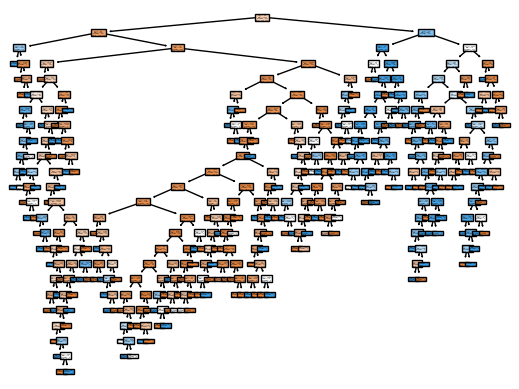

<Figure size 640x480 with 0 Axes>

In [25]:
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("tree.png")

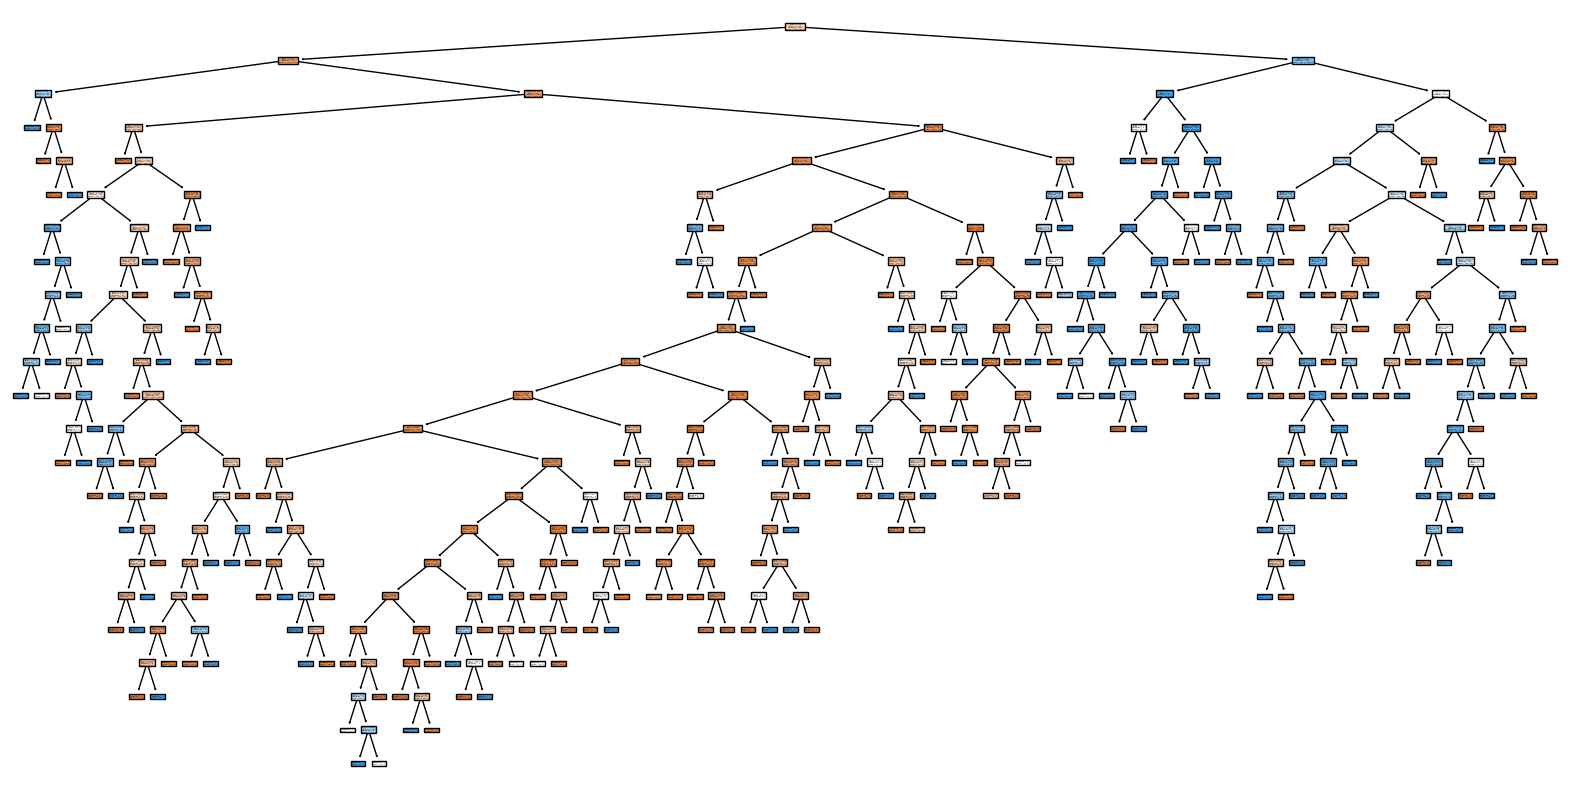

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("wide_tree.pdf",format='pdf',dpi=300)

In [30]:
# Precision through precision score , recall score and f1 accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test,y_pred)
precision

0.7285714285714285

# Definition of precision score and recall score
#### Precision: it measures the proportion of true positive predictions among all positive predictions
true positives / (true positives + false positives)
How many retrived items are relevant?
#### Recall: it measures the proportion of true positive predictions among all actual instances
true positives / (true positives + false negatives)
how many relevant items are retrived?

In [31]:
recall_score(y_test,y_pred)

0.6538461538461539

In [32]:
f1_score(y_test,y_pred) # f1_score is actually harmonic mean of precision score and recall score

0.6891891891891891

In [61]:
# making confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[87 14]
 [27 51]]
precision score:  0.7846153846153846
recall score:  0.6538461538461539
f1 score:  0.7132867132867133


Text(0.5, 23.52222222222222, 'Predicted Label')

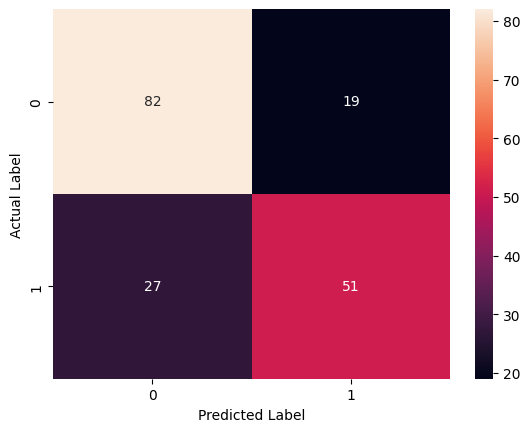

In [39]:
sns.heatmap(cm, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

K-Nearest Neighbours (KNN)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#y_pred
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[76 25]
 [32 46]]
precision score:  0.647887323943662
recall score:  0.5897435897435898
f1 score:  0.6174496644295302


Text(0.5, 23.52222222222222, 'Predicted Label')

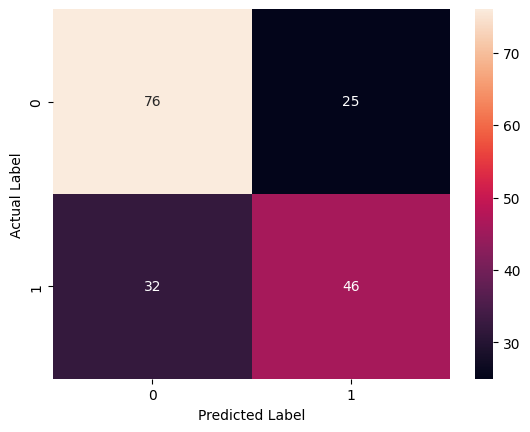

In [53]:
sns.heatmap(cm, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## Random forest model

In [56]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#y_pred
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[94  7]
 [26 52]]
precision score:  0.8813559322033898
recall score:  0.6666666666666666
f1 score:  0.7591240875912408


## Logistic Regression:
it is a classifier not regressor. sigmoid function made it classifier

In [57]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#y_pred
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[89 12]
 [26 52]]
precision score:  0.8125
recall score:  0.6666666666666666
f1 score:  0.7323943661971831


c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machine SVM:

In [59]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#y_pred
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[90 11]
 [58 20]]
precision score:  0.6451612903225806
recall score:  0.2564102564102564
f1 score:  0.3669724770642202


# NAIVE Bayes:

In [60]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#y_pred
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("precision score: ",precision_score(y_test,y_pred))
print("recall score: ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))

[[87 14]
 [27 51]]
precision score:  0.7846153846153846
recall score:  0.6538461538461539
f1 score:  0.7132867132867133


# selecting best model out of 6 models

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# define the models to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(),SVC()]
names = ['Logistic Regression','KNN', 'Random Forest','SVM']

# perform K-fold cross-validation for each model
k= 10
for name, model in zip(names, models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")

c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic Regression CV accuracy: 0.798 +/- 0.033
KNN CV accuracy: 0.729 +/- 0.049
Random Forest CV accuracy: 0.812 +/- 0.017
SVM CV accuracy: 0.695 +/- 0.024


so the random forest model is the best as compare to other models